In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"vpd.csv")

In [6]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [7]:
df["NPD_WELL_BORE_NAME"].value_counts()

15/9-F-4       3327
15/9-F-5       3306
15/9-F-12      3056
15/9-F-14      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64

In [8]:
df.drop("NPD_WELL_BORE_CODE", axis=1, inplace=True)

In [9]:
def well_dataframe(well_name):
    # Taking the well name and generating the dataframe for that well

    df_well = df[df["NPD_WELL_BORE_NAME"] == well_name]
    df_well = df_well.reset_index()
    
    if "index" in df_well.columns:
        df_well.drop("index", axis=1, inplace=True)
    else:
        df_well = df_well
        
    df_well["DATEPRD"] = pd.to_datetime(df_well["DATEPRD"])

    return df_well

In [11]:
df_1 = well_dataframe("15/9-F-4")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

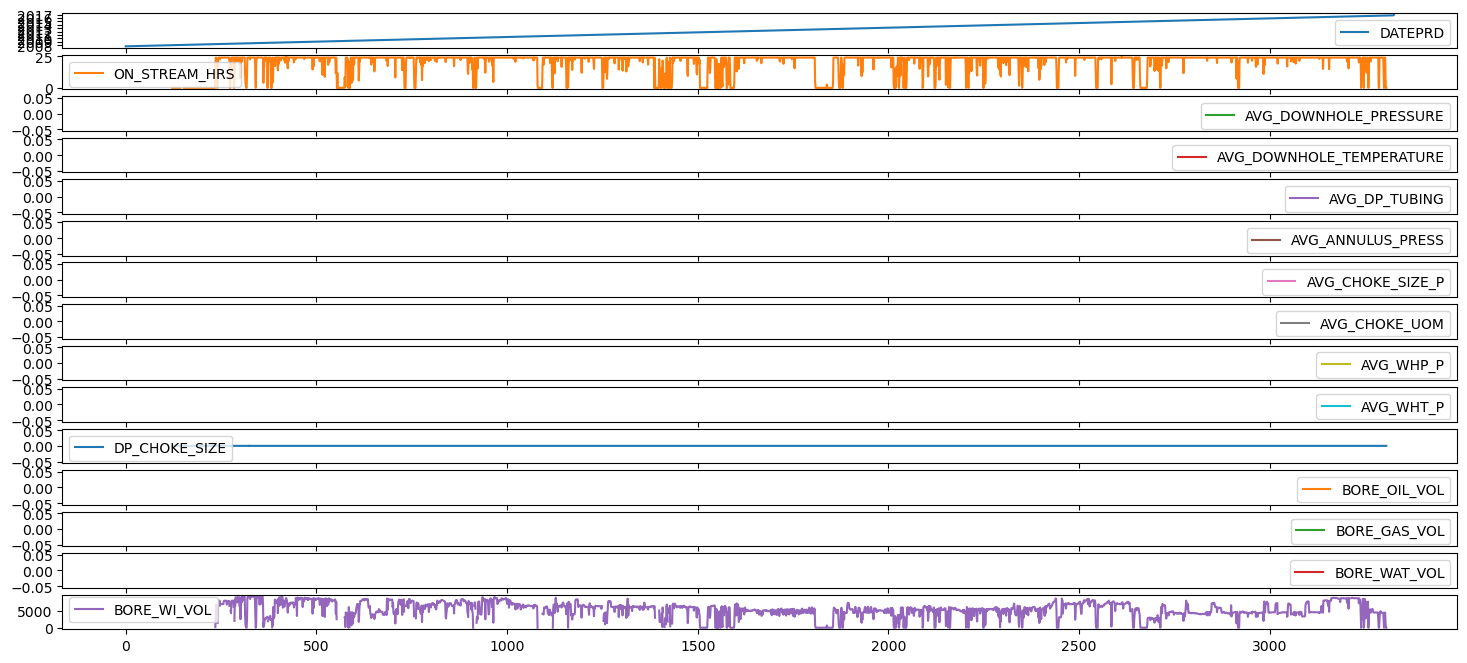

In [12]:
df_1.plot(subplots=True, figsize=(18, 8))

In [15]:
df_1["WELL_TYPE"].value_counts()

WI    3327
Name: WELL_TYPE, dtype: int64

<Axes: >

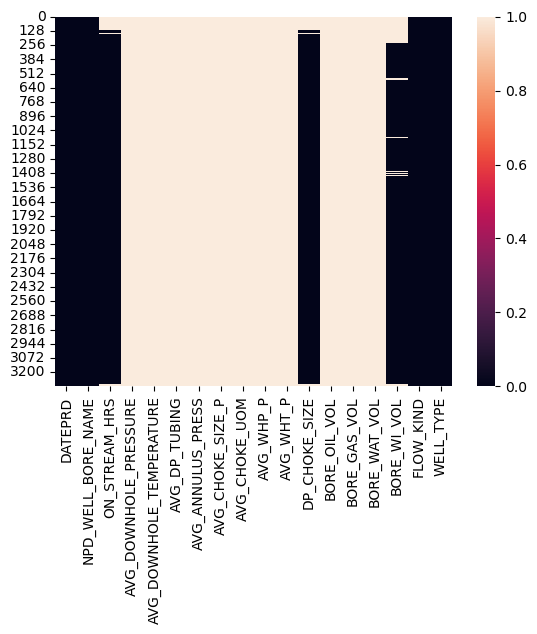

In [13]:
sns.heatmap(df_1.isna())

In [16]:
df_1.drop(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',\
           'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',\
                'AVG_WHT_P', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'FLOW_KIND', 'WELL_TYPE'], axis=1, inplace=True)

<Axes: >

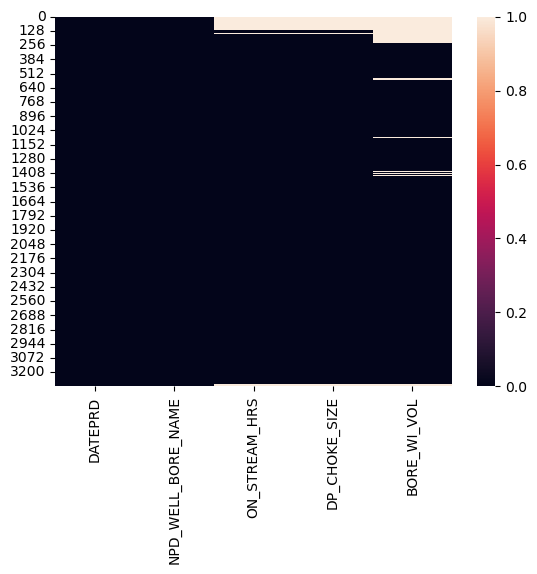

In [17]:
sns.heatmap(df_1.isna())

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

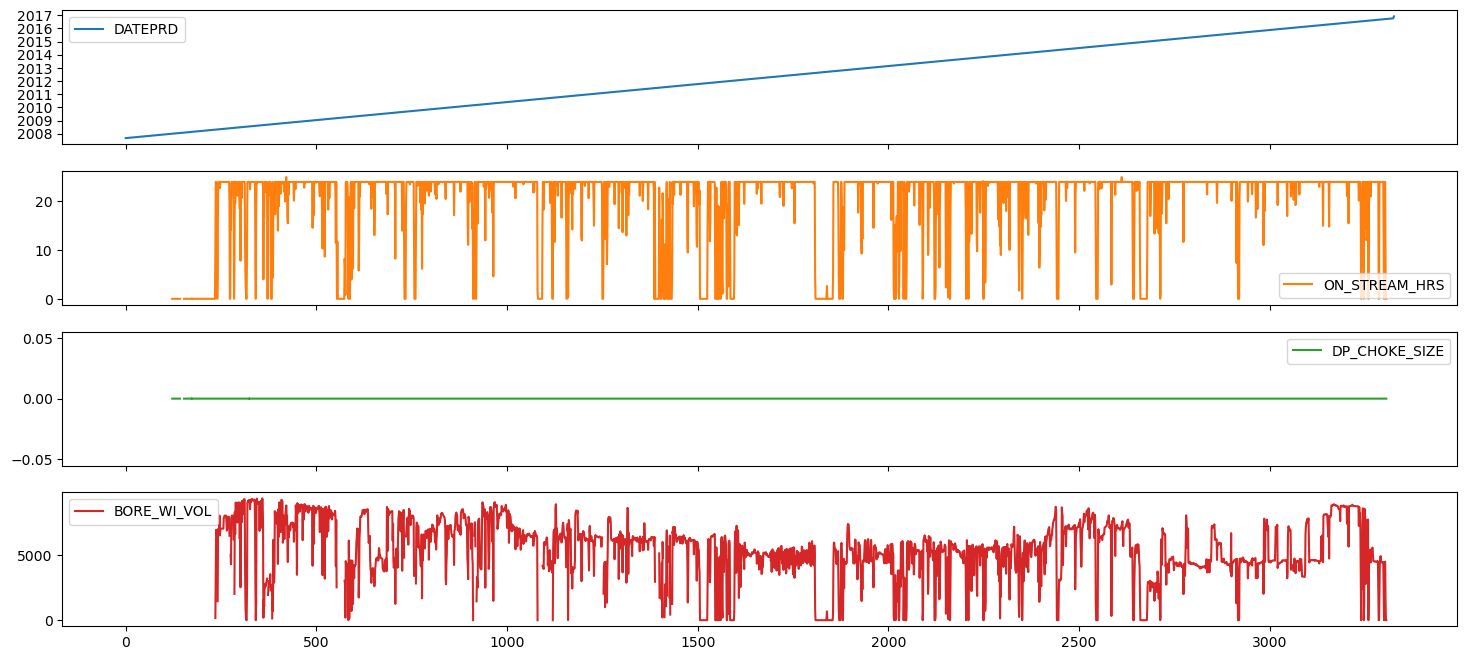

In [18]:
df_1.plot(subplots=True, figsize=(18, 8))

In [22]:
df_1.drop("DP_CHOKE_SIZE", axis=1, inplace=True)

In [25]:
df_1.drop("NPD_WELL_BORE_NAME", axis=1, inplace=True)

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>], dtype=object)

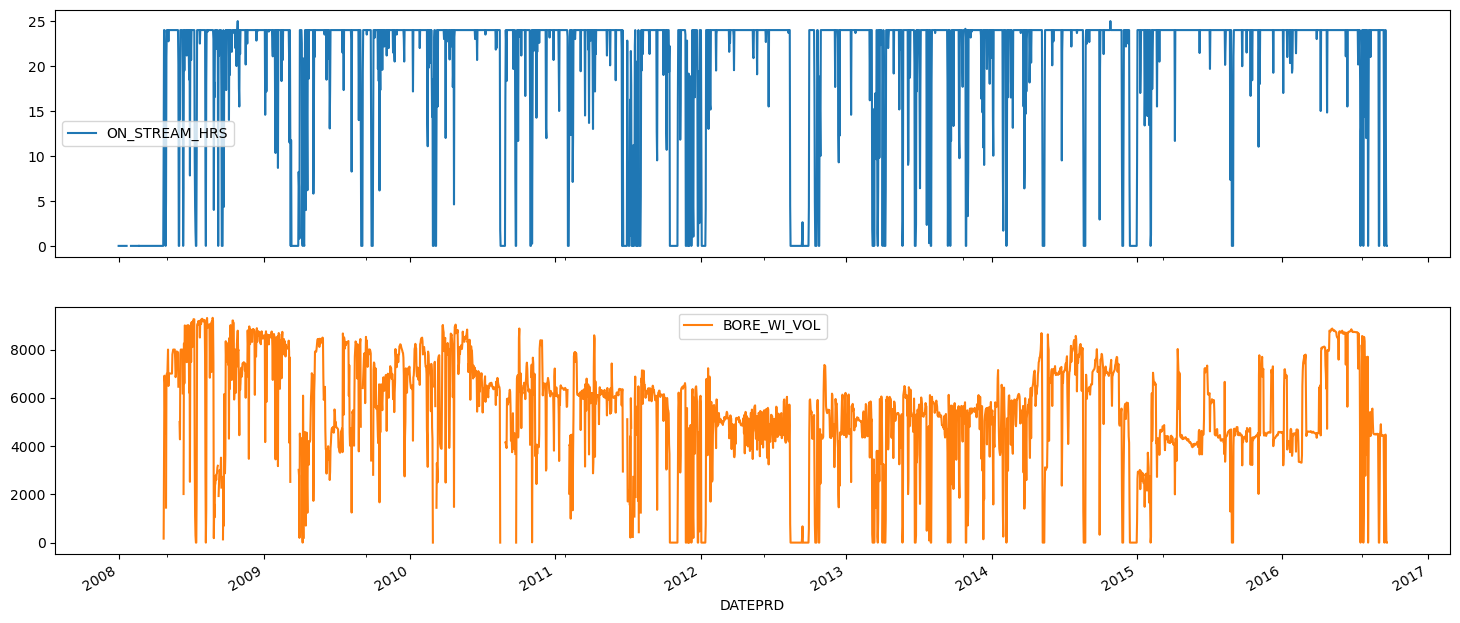

In [28]:
df_1.set_index("DATEPRD").plot(subplots=True, figsize=(18, 8))

<Axes: >

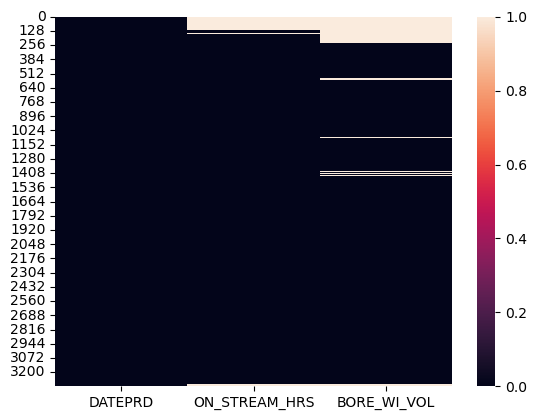

In [27]:
sns.heatmap(df_1.isna())

<Axes: >

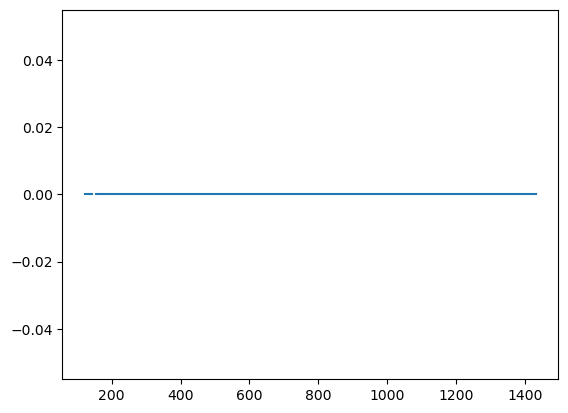

In [30]:
df_1[df_1["BORE_WI_VOL"].isna()]["ON_STREAM_HRS"].plot()
# So on stream hours is zero when WI VOL is not available. so WI Vol will be ZERo too.

In [31]:
df_1.fillna(value=0, inplace=True)

<Axes: >

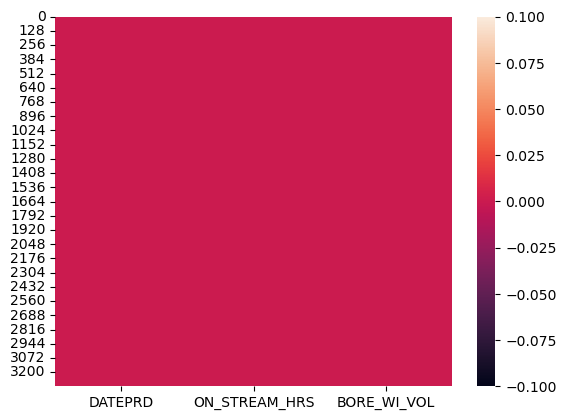

In [32]:
sns.heatmap(df_1.isna())

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>], dtype=object)

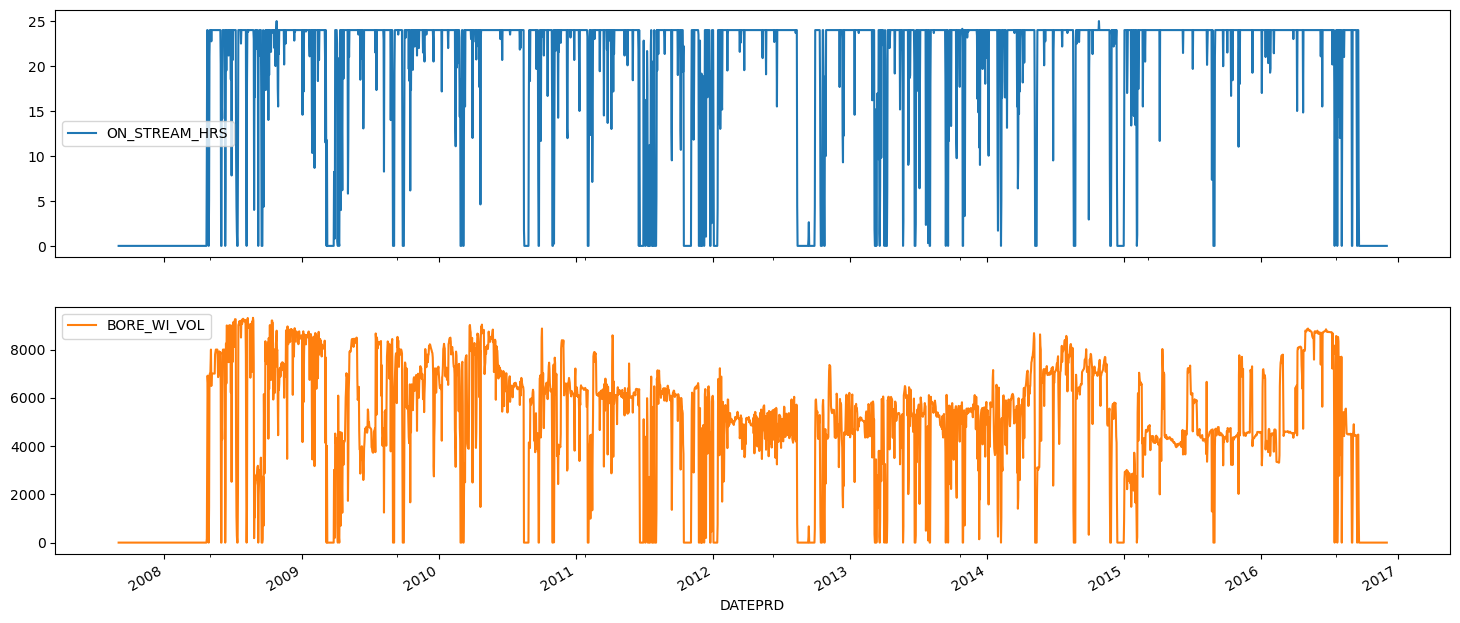

In [33]:
df_1.set_index("DATEPRD").plot(subplots=True, figsize=(18, 8))